# Ensemble Learning Lab

By the end of this lab you will review:
- Bootstrapping and Aggregating (Bagging)
- Random Forests with Feature Sub–Sampling
- Boosting with AdaBoost
- Additional concepts on reproducibility and cross–validation

## Bootstrapping and Aggregating (Bagging)

In this section we demonstrate how to generate bootstrap samples from a dataset and aggregate predictions by computing summary statistics.

In [3]:
import numpy as np
import pandas as pd

# create a sample dataset representing model outcomes
data = np.array([10, 12, 11, 13, 12, 9, 15, 12, 10, 11])

data

array([10, 12, 11, 13, 12,  9, 15, 12, 10, 11])

The above cell creates a NumPy array (or vector) named `data` that contains a series of numerical values. These numbers simulate target values from a simple model.

Let's measure the variance of this vector.

In [4]:
np.var(data)

np.float64(2.65)

Let's observe as to what happens when we apply the bootstrap. First we will impelement a function that randomly samples from our dataset.

In [5]:
def bootstrap_sample(data, sample_size):
    # sample with replacement using numpy's random.choice function
    return np.random.choice(data, size=sample_size, replace=True)

bootstrap_sample(data, 5)

array([10, 15, 11, 12,  9])

In [ ]:
# we will be creating a new sample of the same length as our original sample. Notice that we still get a different set from our original!
bootstrap_sample(data, len(data))

array([10, 11, 15, 11, 12, 10, 13, 11, 12, 13])

This cell defines a function called `bootstrap_sample` that takes in the original data and a desired sample size. The function uses `np.random.choice` with `replace=True` to randomly sample data points with replacement, simulating the bootstrapping process. It then generates a bootstrap sample equal in length to the original data and prints it. 

Using this function, we will resample our dataset, calculate the average of each sample, and re-evaluate variance. 

In [ ]:
# generate bootstrap samples and compute averages
resampled_means = []
for i in range(5):
    # TODO: re-sample using the `bootstap_sample` function (use the same length of your original sample)
    sample = ...
    # TODO: calculate its' mean and append to list
    mean = ...
    ...

resampled_means

[np.float64(11.7),
 np.float64(11.2),
 np.float64(10.2),
 np.float64(11.9),
 np.float64(11.2)]

In this cell, we generate 5 bootstrap samples using a for loop. Think of this as the `map` pattern from decades ago (phase 1). For each bootstrap sample, we compute the average value. The resulting list of averages is printed. This demonstrates how aggregating predictions (using the mean) over multiple bootstrapped datasets can help reduce variance in estimates.

Let's observe if variance was reduced in our new dataset.

In [9]:
np.var(resampled_means)

np.float64(0.3464000000000002)

Amazing! We went from 2.65 to 0.34. Let's see how we apply this to our decision trees.

## Random Forests: Extending Bagging with Feature Sub–Sampling

In this section we move beyond basic bootstrapping by applying the Random Forest algorithm. Random forests extend bagging by training each decision tree on a random subset of features, which further decorrelates the models and improves prediction robustness.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# TODO: load the bank dataset
...

# TODO: select predictors & target variables
...
...

# TODO: perform a train test split
...

In [12]:
# instantiate a RandomForestClassifier with a fixed random seed for reproducibility
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# let's generate a classification report to see how well our random forest performed
yhat = rf.predict(X_test) 

confusion = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)

print("Confusion Matrix \n", confusion)
print("\nClassification Report\n", class_report)

Confusion Matrix 
 [[776  31]
 [ 77  21]]

Classification Report
               precision    recall  f1-score   support

          no       0.91      0.96      0.93       807
         yes       0.40      0.21      0.28        98

    accuracy                           0.88       905
   macro avg       0.66      0.59      0.61       905
weighted avg       0.85      0.88      0.86       905



While it seems like we have comparable accuracy to our decision tree, let's see what happens when we perform hyperparameter search.

In [ ]:
# TODO: implement random search on the RandomForestClassifier model to find best hyperparams
# DOCS: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
param_dist = {
    "criterion": ...,
    "max_depth": ...,
    "min_samples_split": ...,
    "max_features": ...
}

# TODO: set up RandomizedSearchCV with 5-fold cross-validation
...

# TODO: fit this model on your training data
...

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(10, 100, 5),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': range(2, 50, 2)},
                   random_state=42)

In [ ]:
# TODO: extract the best rf estimator
rf_best = ...

# TODO: use this estimator to generate "yhat" on your X_test dataset
yhat = ...

# TODO: generate a confusion matrix and a classification report
confusion = ...
class_report = ...

print("Confusion Matrix \n", confusion)
print("\nClassification Report\n", class_report)

Confusion Matrix 
 [[785  22]
 [ 73  25]]

Classification Report
               precision    recall  f1-score   support

          no       0.91      0.97      0.94       807
         yes       0.53      0.26      0.34        98

    accuracy                           0.90       905
   macro avg       0.72      0.61      0.64       905
weighted avg       0.87      0.90      0.88       905



Wow, 26% recall on "yes" instances. This seems to be highest we've gotten so far! 

Keep in mind that there are other techniques we can employ to try for higher success metrics. This involves:
* scaling your data
* using grid-search
* feature engineering

Some of which you will employ in tonights challenge. 

But before we get to that, let's evaluate our "impurity" removed metric to evaluate the most important features in our dataset.

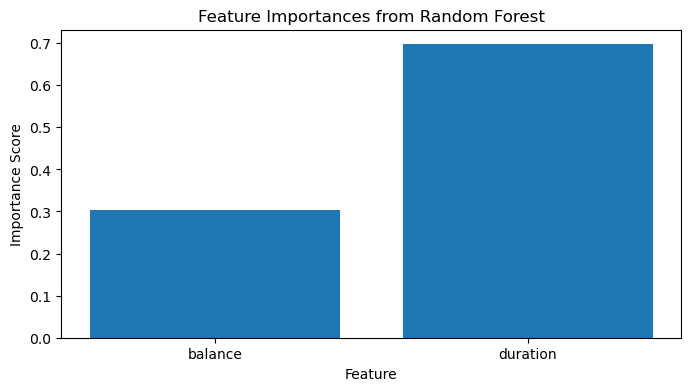

In [21]:
# extract feature importances from the trained RandomForest model
importances = rf_best.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importances
plt.figure(figsize=(8, 4))
plt.bar(feature_names, importances)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.show()

This cell first retrieves the feature importance scores from the fitted Random Forest model and then plots these scores using a bar plot. The x-axis shows the feature names and the y-axis indicates the importance score for each feature. The plot helps visualize how much each feature contributes to the model's decision-making process.

It appears that performing splits on the "duration" variable leads to more impurity removed, so we therefore reason that "duration" is more important than "balance" in terms of converting outreach into paying customers.

## Boosting with AdaBoost

Boosting is a sequential ensemble method where each new model attempts to correct the errors of its predecessor. In this section, we work with AdaBoost, which uses decision stumps (trees with a single split) as weak learners and iteratively adjusts the weights of training samples.

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# create a decision stump (a tree with max_depth=1) to use as the weak learner
stump = DecisionTreeClassifier(max_depth=1)

# initialize the AdaBoostClassifier with 50 weak learners and a fixed random state
ada = AdaBoostClassifier(estimator=stump, random_state=42)

ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In this cell, we first import `AdaBoostClassifier` and `DecisionTreeClassifier` from scikit-learn. A decision stump is created as a weak learner by setting `max_depth=1`. The AdaBoost classifier is then initialized with 50 estimators (`n_estimators=50`) and a fixed random state for reproducibility. Finally, the AdaBoost model is trained on the bank marketing dataset.

Let's evaluate its' accuracy.

In [61]:
# let's generate a classification report to see how well our random forest performed
yhat = ada.predict(X_test) 

confusion = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)

print("Confusion Matrix \n", confusion)
print("\nClassification Report\n", class_report)

Confusion Matrix 
 [[767  40]
 [ 62  36]]

Classification Report
               precision    recall  f1-score   support

          no       0.93      0.95      0.94       807
         yes       0.47      0.37      0.41        98

    accuracy                           0.89       905
   macro avg       0.70      0.66      0.68       905
weighted avg       0.88      0.89      0.88       905



37% recall on "yes" cases?!?! With no scaling? No feature selection? No hyperparameter search? Just plain out-of-the-box machine learning?

![amazing](https://i.pinimg.com/736x/3d/8e/9d/3d8e9d8286222e3705e0636b94832335.jpg)

You should immediately be heading to Kaggle right now to try to win a competition or two.

Let's follow this up with some actual hyperparameter search.

In [ ]:
# TODO: implement random search on the AdaBoostClassifier model to find best hyperparams
# DOCS: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
...

# TODO: set up RandomizedSearchCV with 5-fold cross-validation
...

# TODO: fit this model on your training data
...

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                                random_state=42),
                   param_distributions={'learning_rate': array([1.        , 1.04081633, 1.08163265, 1.12244898, 1.16326531,
       1.20408163, 1.24489796, 1.28571429, 1.32653061, 1.36734694,
       1.40816327, 1.44897959, 1.48979592, 1.53061224, 1.57142857,
       1.6122449 , 1.65306122, 1.69387755, 1...
       1.81632653, 1.85714286, 1.89795918, 1.93877551, 1.97959184,
       2.02040816, 2.06122449, 2.10204082, 2.14285714, 2.18367347,
       2.2244898 , 2.26530612, 2.30612245, 2.34693878, 2.3877551 ,
       2.42857143, 2.46938776, 2.51020408, 2.55102041, 2.59183673,
       2.63265306, 2.67346939, 2.71428571, 2.75510204, 2.79591837,
       2.83673469, 2.87755102, 2.91836735, 2.95918367, 3.        ]),
                                        'n_estimators': range(50, 150, 5)},
                   random_state=42)

In [ ]:
# TODO: extract the best adaboost estimator
...

# TODO: use this estimator to generate "yhat" on your X_test dataset
...

# TODO: generate a confusion matrix and a classification report
...
...

print("Confusion Matrix \n", confusion)
print("\nClassification Report\n", class_report)

Confusion Matrix 
 [[792  15]
 [ 84  14]]

Classification Report
               precision    recall  f1-score   support

          no       0.90      0.98      0.94       807
         yes       0.48      0.14      0.22        98

    accuracy                           0.89       905
   macro avg       0.69      0.56      0.58       905
weighted avg       0.86      0.89      0.86       905



It seems like we increased precision at the cost of our recall. This reveals that while adaboost is a powerful machine learning model, it will be poorly trained unless we specify the measure it should optimize.

Let's focus our training efforts on the `f1_score` metric by creating a customized scorer via the `make_scorer` method. This is a second-order function which takes in other functions (such as f1_score, or precision_score) along with additional parameters which specify what we should consider a positive case (`pos_label`) and lastly how to handle cases when we get 0 in the denominator (`zero_division`).

In [ ]:
from sklearn.metrics import f1_score, make_scorer

# set up an f1 scorer
f1_scorer = make_scorer(f1_score, pos_label='yes', zero_division=0)

We also increase the number of training iterations to `n_iter=100` so that we can explore a wider "area" of hyperparameter combinations in our `RandomizedSearchCV` object.

In [71]:
# set up RandomizedSearchCV with 5-fold cross-validation, n_iter of 50, and an f1 scoring parameter
random_search = RandomizedSearchCV(ada, param_distributions=param_dist, cv=5, n_iter=100, scoring=f1_scorer, random_state=42)

# fit this model on your training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                                random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': array([1.        , 1.04081633, 1.08163265, 1.12244898, 1.16326531,
       1.20408163, 1.24489796, 1.28571429, 1.32653061, 1.36734694,
       1.40816327, 1.44897959, 1.48979592, 1.53061224, 1.57142857,
       1.6122449 , 1.65306122, 1...
       2.02040816, 2.06122449, 2.10204082, 2.14285714, 2.18367347,
       2.2244898 , 2.26530612, 2.30612245, 2.34693878, 2.3877551 ,
       2.42857143, 2.46938776, 2.51020408, 2.55102041, 2.59183673,
       2.63265306, 2.67346939, 2.71428571, 2.75510204, 2.79591837,
       2.83673469, 2.87755102, 2.91836735, 2.95918367, 3.        ]),
                                        'n_estimators': range(50, 150, 5)},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict', pos_label=yes, zero_division=0))

In [ ]:
# TODO: extract the best adaboost estimator
...

# TODO: use this estimator to generate "yhat" on your X_test dataset
...

# TODO: generate a confusion matrix and a classification report
...
...

print("Confusion Matrix \n", confusion)
print("\nClassification Report\n", class_report)

Confusion Matrix 
 [[1169   36]
 [ 127   25]]

Classification Report
               precision    recall  f1-score   support

          no       0.90      0.97      0.93      1205
         yes       0.41      0.16      0.23       152

    accuracy                           0.88      1357
   macro avg       0.66      0.57      0.58      1357
weighted avg       0.85      0.88      0.86      1357



In the above cell, we may have failed to find hyperparameters that resulted in a meaningful increase of f1-score. This highlights the importance of continuously iterating on your models using the feature engineering, regularizing, and oversampling techniques that we've explored throughout the past modules.